In [67]:
# SOAL 1

# Buatlah kode yang melakukan webscraping pada situs kompas.com. Tujuannya
# adalah mengambil semua berita yang dikeluarkan oleh kompas pada tanggal
# tertentu.

# 1. Ambil untuk semua kategori
# 2. Ambil untuk tanggal 1 desember 2021
# 3. Ambil halaman 1-5

# output minta tanggal 3 desember mana yang benar? :(

import pandas as pd
import requests 
from bs4 import BeautifulSoup

baseUrl = "https://indeks.kompas.com/"

category="all"
date="2021-12-01"
numPage = 5
url = f"{baseUrl}?site={category}&date={date}"

# karena request berdasarkan tanggal tertentu, 
# sepertinya saya tidak perlu parsing dari html
# kecuali kalau request berdasarkan range tanggal

headers = {
    "content-type":"text", 
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"
}
news = []
for i in range(numPage):
    page = i+1
    response = requests.get(f"{url}&page={page}", headers=headers)
    doc = BeautifulSoup(response.text, "html.parser")
    titleTags = doc.find_all("div", class_="article__list clearfix")

    for title in titleTags:
        new = {
            "date": date,
            "title": title.h3.text
        }
        news.append(new)

# Simpan hasilnya dalam bentuk df dan simpan data tanggal dan berita
# Tampilkan dataframenya

df = pd.DataFrame(news)
display(df)

# Simpan juga dalam bentuk .csv dengan nama kompas_20211201.csv
convertedDate = date.replace("-", "")
df.to_csv(f"kompas_{convertedDate}.csv", index=False)


,date,title
0,2021-12-01,"Genoa Vs AC Milan, Shevchenko Ingin Buat Manta..."
1,2021-12-01,ODHA di Depok Masih Dapat Stigma Negatif
2,2021-12-01,Pemprov Jakarta Bentuk Tim Khusus Awasi Alat M...
3,2021-12-01,Penonton Lokal Piala AFF 2020 Acuhkan 5 Aturan...
4,2021-12-01,"Pada Akhir Pekan, Penumpang di Bandara Soekarn..."
...,...,...
195,2021-12-01,Pemerintah Bakal Kembali Terbitkan SKB 4 Mente...
196,2021-12-01,Densus 88 Sita Senapan M16 dan 124 Peluru dari...
197,2021-12-01,Foto Viral Pasutri Naik Motor hingga Menara Ei...
198,2021-12-01,Momen Indro Satukan Lagi Warkop DKI Setelah Ka...


In [66]:
# SOAL 2
# Buka kompas_20211201.csv dan masukkan dalam dataframe
# Lakukan pembersihan
# 1. Case folding
# 2. Stopwords
# Simpan hasilnya dalam bentuk dataframe
# Tampilkan dataframenya

import pandas as pd
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import  StemmerFactory

# 0. Read a file
df = pd.read_csv("./kompas_20211201.csv")

# 1. Case folding
df["clean_title"] = df["title"].apply(lambda x: x.lower())
df["clean_title"] = df["clean_title"].apply(lambda x: re.sub(
    r"\d+|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x
).strip())
df["clean_title"] = df["clean_title"].apply(lambda x: x.strip())
df["clean_title"] = df["clean_title"].apply(
    lambda x: x.translate(x.maketrans("", "", string.punctuation))
)

# 2. Remove stop words
blackList = stopwords.words('indonesian')
def stopWordRemoval(text):
    textList =  [word for word in text if word not in blackList]
    return " ".join(textList)

df["clean_title"] = df["clean_title"].apply(lambda x: word_tokenize(x))
df["clean_title"] = df["clean_title"].apply(stopWordRemoval)

# Saya ingin mengimplemantasi stemming 
# tapi di bentuk output tidak dalam bentuk kata dasar

# Save to csv file and show it
df.to_csv("kompas_20211201_clean.csv", index=False)
df.head()

,date,title,clean_title
0,2021-12-01,"Genoa Vs AC Milan, Shevchenko Ingin Buat Manta...",genoa vs ac milan shevchenko mantan klub kesul...
1,2021-12-01,ODHA di Depok Masih Dapat Stigma Negatif,odha depok stigma negatif
2,2021-12-01,Pemprov Jakarta Bentuk Tim Khusus Awasi Alat M...,pemprov jakarta bentuk tim khusus awasi alat m...
3,2021-12-01,Penonton Lokal Piala AFF 2020 Acuhkan 5 Aturan...,penonton lokal piala aff acuhkan aturan
4,2021-12-01,"Pada Akhir Pekan, Penumpang di Bandara Soekarn...",pekan penumpang bandara soekarno hatta capai o...


,date,title,clean_title
0,2021-12-01,"Genoa Vs AC Milan, Shevchenko Ingin Buat Manta...",genoa vs ac milan shevchenko mantan klub kesul...
1,2021-12-01,ODHA di Depok Masih Dapat Stigma Negatif,odha depok stigma negatif
2,2021-12-01,Pemprov Jakarta Bentuk Tim Khusus Awasi Alat M...,pemprov jakarta bentuk tim khusus awasi alat m...
3,2021-12-01,Penonton Lokal Piala AFF 2020 Acuhkan 5 Aturan...,penonton lokal piala aff acuhkan aturan
4,2021-12-01,"Pada Akhir Pekan, Penumpang di Bandara Soekarn...",pekan penumpang bandara soekarno hatta capai o...


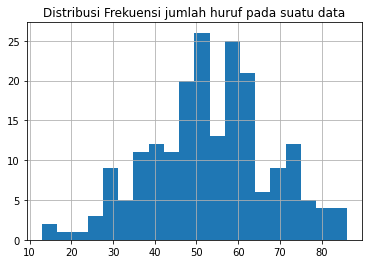

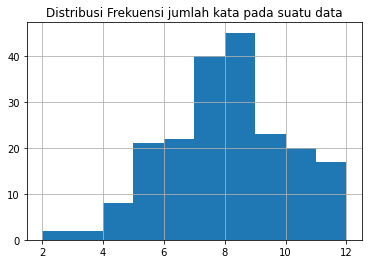

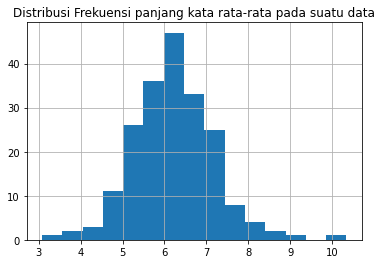

Distribusi Frekuensi kata yang sering keluar


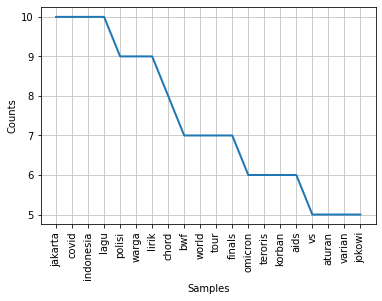

#Distribusi N-gram
(chord, lagu)         8
(lirik, chord)        8
(bwf, world)          7
(world, tour)         7
(tour, finals)        7
(piala, aff)          4
(terduga, teroris)    4
(ppkm, level)         4
(varian, omicron)     4
(aids, sedunia)       3
dtype: int64


In [64]:
# SOAL 3
# Buka kompas_20211201_clean.csv dan masukkan dalam dataframe
# Lakukan Text data analysis:
# 1. Distribusi Frekuensi jumlah huruf pada suatu data
# 2. Distribusi Frekuensi jumlah kata pada suatu data
# 3. Distribusi Frekuensi panjang kata rata-rata pada suatu data
# 4. Distribusi Frekuensi kata yang sering keluar
# 5. Distribusi N-gram
# Tampilkan semua plot dari 1-4
# Tampilkan/print data 10 bi-gram yang paling banyak keluar.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.util import ngrams

# 0. Read a file
df = pd.read_csv("./kompas_20211201_clean.csv")
display(df.head())

# 1. Distribusi Frekuensi jumlah huruf pada suatu data
df["clean_title"].str.len().hist(bins=20)
plt.title("Distribusi Frekuensi jumlah huruf pada suatu data")
plt.show()

# 2. Distribusi Frekuensi jumlah kata pada suatu data
df["clean_title"].str.split().map(lambda x: len(x)).hist(bins=10)
plt.title("Distribusi Frekuensi jumlah kata pada suatu data")
plt.show()

# 3. Distribusi Frekuensi panjang kata rata-rata pada suatu data
def getAvgWord(x):
      x = x.split()
      x = map(lambda x: len(x), x)
      return(np.average(list(x)))

df["clean_title"].apply(getAvgWord).hist(bins=15)
plt.title("Distribusi Frekuensi panjang kata rata-rata pada suatu data")
plt.show()


# 4. Distribusi Frekuensi kata yang sering keluar
print("Distribusi Frekuensi kata yang sering keluar")
df["tokenize"] = df["clean_title"].apply(lambda x: word_tokenize(x)) 
allWord = [word for title in df["tokenize"] for word in title]
fqdist = FreqDist(allWord)
fqdist.plot(20, cumulative=False)
plt.show()

# 5. Distribusi N-gram
nWord = 10
n = 2
allWord = [word for tweet in df["tokenize"] for word in tweet]
result = pd.Series(ngrams(allWord, n)).value_counts()[:nWord]
print("#Distribusi N-gram")
print(result)




#### SOAL 4
Analisa hasil dari Text Analysis yang kalian lakukan, misal berita dengan tema apa yang sedang banyak diberitakan hari itu. Jika ada tema tertentu yang terlihat bisa dijelaskan per tema

semua file ipynb bisa diakses di : 
https://drive.google.com/file/d/1MgLYksLO1kYl5zfX0KRIWXzsaL2c512e/view?usp=sharing

1. Covid 
a. keyword 
- word-count keyword : covid, omicron, aturan, varian
- bigram keyword : ppkm-level, varian-omicron

b. deskripsi
Covid nampaknya masih menjadi berita yang kerap muncul, setidaknya di tanggal dilakukan pencarian data (1 Desember 2021). Meskipun kasusnya sudah cukup reda, namun perbincangan ini bertahan mengingat ada dua hal: yakni kasus varian baru yaitu omicron, dan pemberlakuan aturan ppkm pada akhir tahun mendatang. Hal ini diperjelas dengan kemunculan dua pasangan kata ppkm-level dan varian-omicron pada distibusi bigram.

2. Musik 

a. keyword 
- word-count keyword : lirik, chord, lagu
- bigram keyword : chord-lagu, lirik-chord

b. deskripsi
Musik menjadi salah satu berita entertainment kompas yang nampaknya rutin diberitakan oleh kompas. Mungkin ini dilakukan untuk menarik pembaca memiliki hobi di bidang ini. Diperkuat dengan frekuensi kata-kata ini muncul baik pada word-count dan distribusi bigram pada peringkat atas.  


3. Olahraga

a. keyword
- word-count keyword : bwf, world, tour, finalis, vs
- bigram keyword : bwf-world, word-tour, tour-finals, piala-aff

b. deskripsi
Selain musik, olahraga menjadi topik yang sering ditampilkan. Terlebih dengan adanya event BWF World Tour Finals. Cabang olahraga bulu tangkis ini menjadi topik yang sangat seksi untuk dibicarakan, mengingat Indonesia memiliki riwayat prestasi yang baik di cabang olahraga ini. Selain topik olahraga mengarah kepada event bwf world tour, muncul pula pembahasan event pada cabang olah-raga sepak bola yakni piala-aff.

4. Kriminal 
a. keyword
- word-count keyword : polisi, warga, korban 
- bigram keyword :terduga-teroris
b. deskripsi
Bukan hal yang aneh, jika berita mewartakan mengenai topik kriminal, mengingat jumlah kasus kriminal di Indonesia sangat banyak. Adapun topik kriminal yang cukup intens di bahas di indonesia adalah topik yang berkenaan dengan terorisme.

4. lain-lain 
a. keyword
- word-count keyword : jakarta, indonesia, polisi, warga, korban, aids, jokowi
- bigram keyword : aids-sedunia

b. deskripsi
Terdapat hal lain yang diungkap oleh harian kompas pada awal desember tahun ini:
- jakarta, indonesia : Hal ini menunjukkan harian kompas lebih mengarah kepada berita nasional (dengan menyebut kata Indonesia), dengan daerah jakarta yang cukup sering diberitakan. Hal ini wajar, mengingat jakarta merupakan ibu kota indonesia
- aids : topik aids menjadi hal yang kerap muncul di bulan desember. karena pada tanggal 1 desember merupakan hari aids sedunia. hal ini dipertegas dengan kemunculan pasangan kata aids-sedunia pada distribusi bigram.
- jokowi : ya, orang nomor satu di indonesia ini tidak aneh jika "jokowi" masuk ke dalam kata-kata yang kerap muncul pada berita. 
  

